<a href="https://colab.research.google.com/github/ffreirea1988/djangoapp/blob/master/Ayudantia_3_RLogistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#LIBRERIAS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [ ]:
#Subir archivo csv en google collab
# google.colab import files
#files.upload()

In [ ]:
#Leer data frame
df = pd.read_csv('Churn_Modelling.csv')

## Primera vista al df

In [ ]:
#(Observaciones, variables)
df.shape

(10000, 14)

In [ ]:
#Verificar valores nulos
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
#Datos unicos por variable
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

Se puede observar que los primeros 2 atributos son especificos para cada cliente, por lo cual a nosotros no nos interesaria esa informacion.

In [ ]:
#Df nuevo sin variables anteriores
df1 = df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

In [ ]:
#Verificamos df nuevo
df1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#Naturaleza de las variables
df1.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

Tenemos variables continuas, enteras y categoricas.

In [ ]:
# Convertir variables objetos en dummies.
df2 = pd.get_dummies(df1, drop_first=True)

In [ ]:
# Chequeamos la conversion
df2.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


En primer lugar, observamos que las variables las cuales tienen 2 opciones (IsActiveMember, Exited, HasCrCard) se toman como variables enteras. Esto es porque al tener dos opciones solamente, se pueden tomar de esta forma ya que las opciones estan a una misma distancia de una y otra.

En cambio, para la variable de pais de origen, al ser 3 distintos, se debe aplicar esto de todas maneras, ya que un pais no es mejor que otro (No hay orden).

## EDA

Nuestra variable a predecir en este caso es exited, que cuando es 0 significa que el cliente fue retenido y cuando es 1 significa que se fue.

In [ ]:
#Informacion estadistica respecto a
df2.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.250900,0.247700,0.545700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.433553,0.431698,0.497932
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,0.000000,1.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,0.000000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000


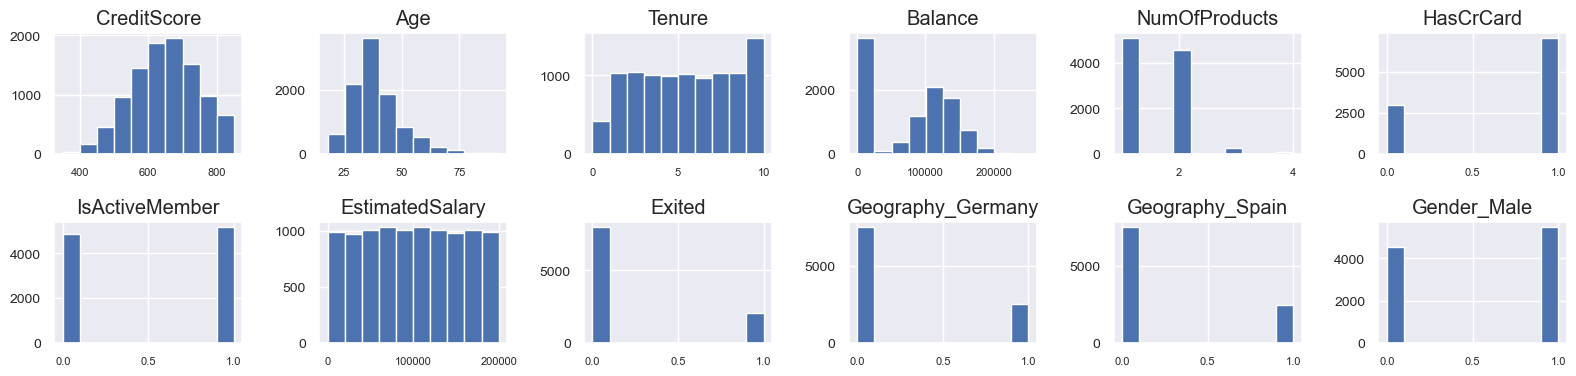

In [ ]:
# Histograma
df2.hist(xlabelsize=8,ylabelsize=10,figsize=(16,4),layout=(2,6))
plt.tight_layout()
plt.show()

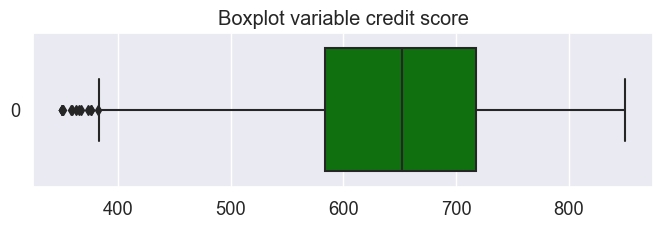

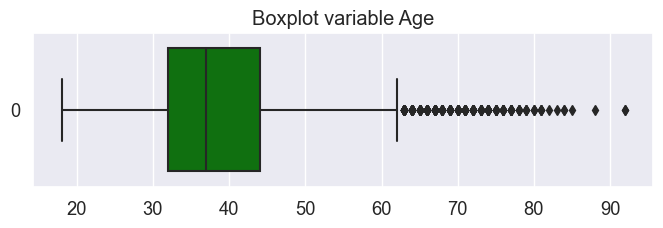

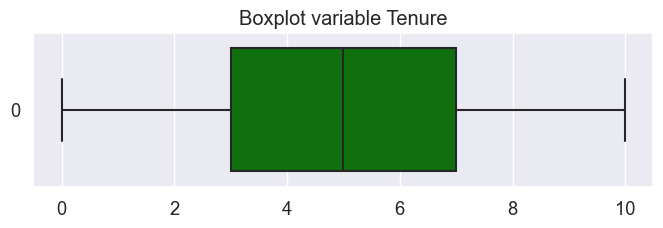

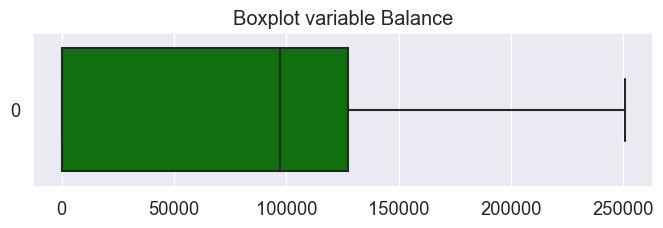

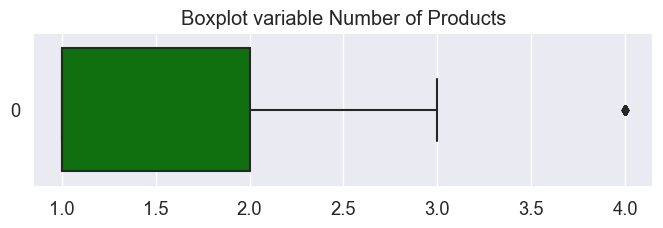

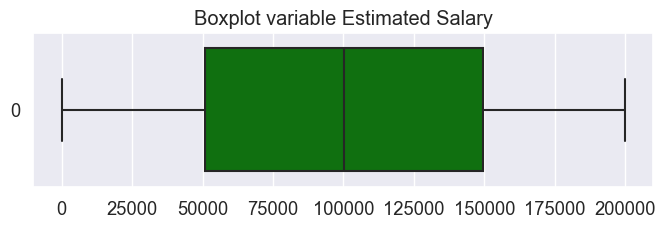

In [ ]:
# Boxplots

plt.figure(figsize=(8,2))
plt.title('Boxplot variable credit score')
sns.boxplot(data=df2['CreditScore'],orient="h", color='green')
plt.show()

plt.figure(figsize=(8,2))
plt.title('Boxplot variable Age')
sns.boxplot(data=df2['Age'],orient="h", color='green')
plt.show()

plt.figure(figsize=(8,2))
plt.title('Boxplot variable Tenure')
sns.boxplot(data=df2['Tenure'],orient="h", color='green')
plt.show()

plt.figure(figsize=(8,2))
plt.title('Boxplot variable Balance')
sns.boxplot(data=df2['Balance'],orient="h", color='green')
plt.show()

plt.figure(figsize=(8,2))
plt.title('Boxplot variable Number of Products')
sns.boxplot(data=df2['NumOfProducts'],orient="h", color='green')
plt.show()

plt.figure(figsize=(8,2))
plt.title('Boxplot variable Estimated Salary')
sns.boxplot(data=df['EstimatedSalary'],orient="h", color='green')
plt.show()



*****VER SI ELIMNAR OBSERVACIONES

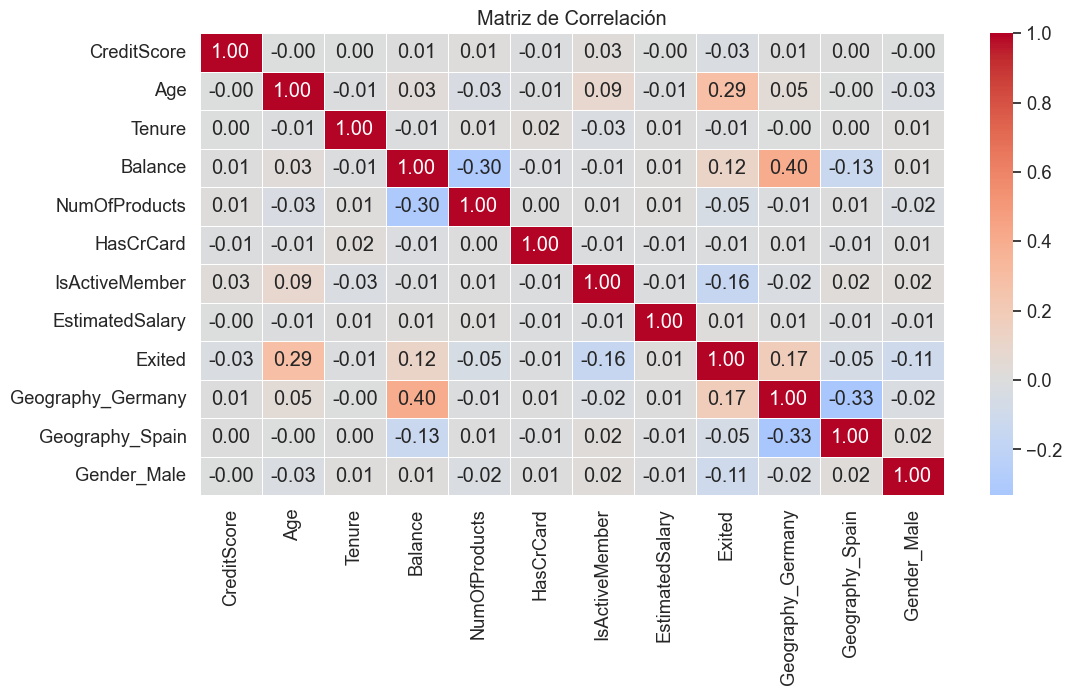

In [ ]:
# Matriz de correlacion

# Calcular la matriz de correlación
corr_matrix = df2.corr()

# Crear una figura y un eje (axis) para el gráfico
plt.figure(figsize=(12, 6))  # Ajusta el tamaño de la figura
sns.set(font_scale=1.2)  # Ajusta el tamaño de la fuente

# Utiliza heatmap para visualizar la matriz de correlación
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", center = 0)

plt.title('Matriz de Correlación')  # Título del gráfico

# Muestra el gráfico
plt.show()

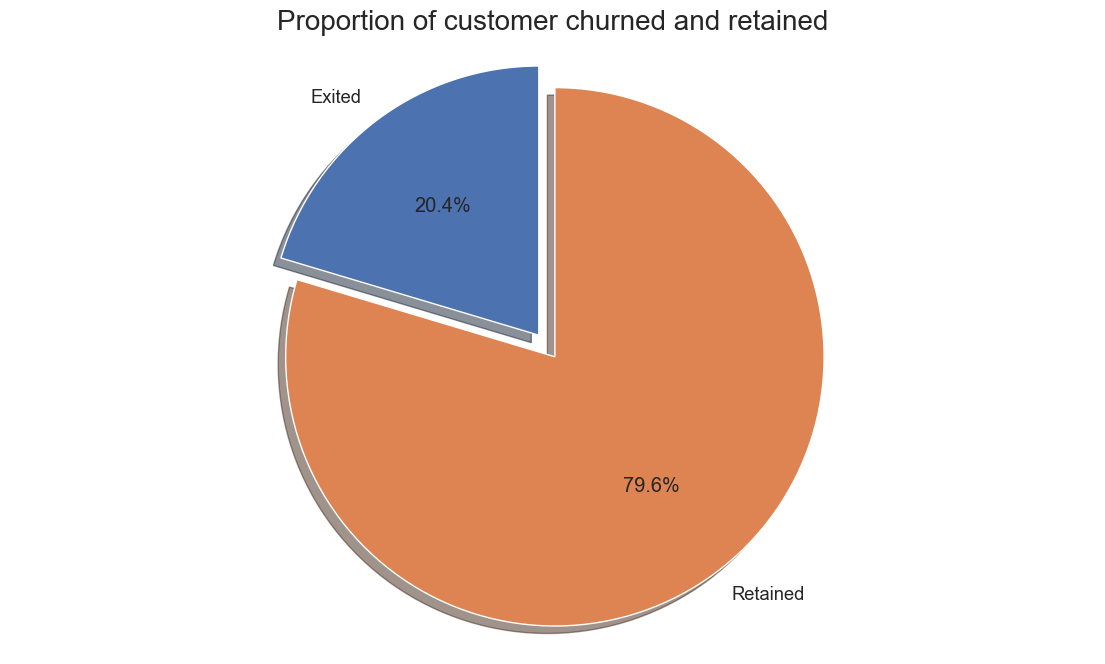

In [ ]:
# Proporcion de clientes retenidos vs los que se fueron
labels = 'Exited', 'Retained'
sizes = [df2.Exited[df2['Exited']==1].count(), df2.Exited[df2['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(14, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()


Observamos que el 20% de los clientes, aproximadamente, han decidido cortar lazos con la compañia.

A continuacion, veremos la relacion entre la variable a predecir y las variables categoricas y numericas.

<Axes: xlabel='IsActiveMember', ylabel='count'>

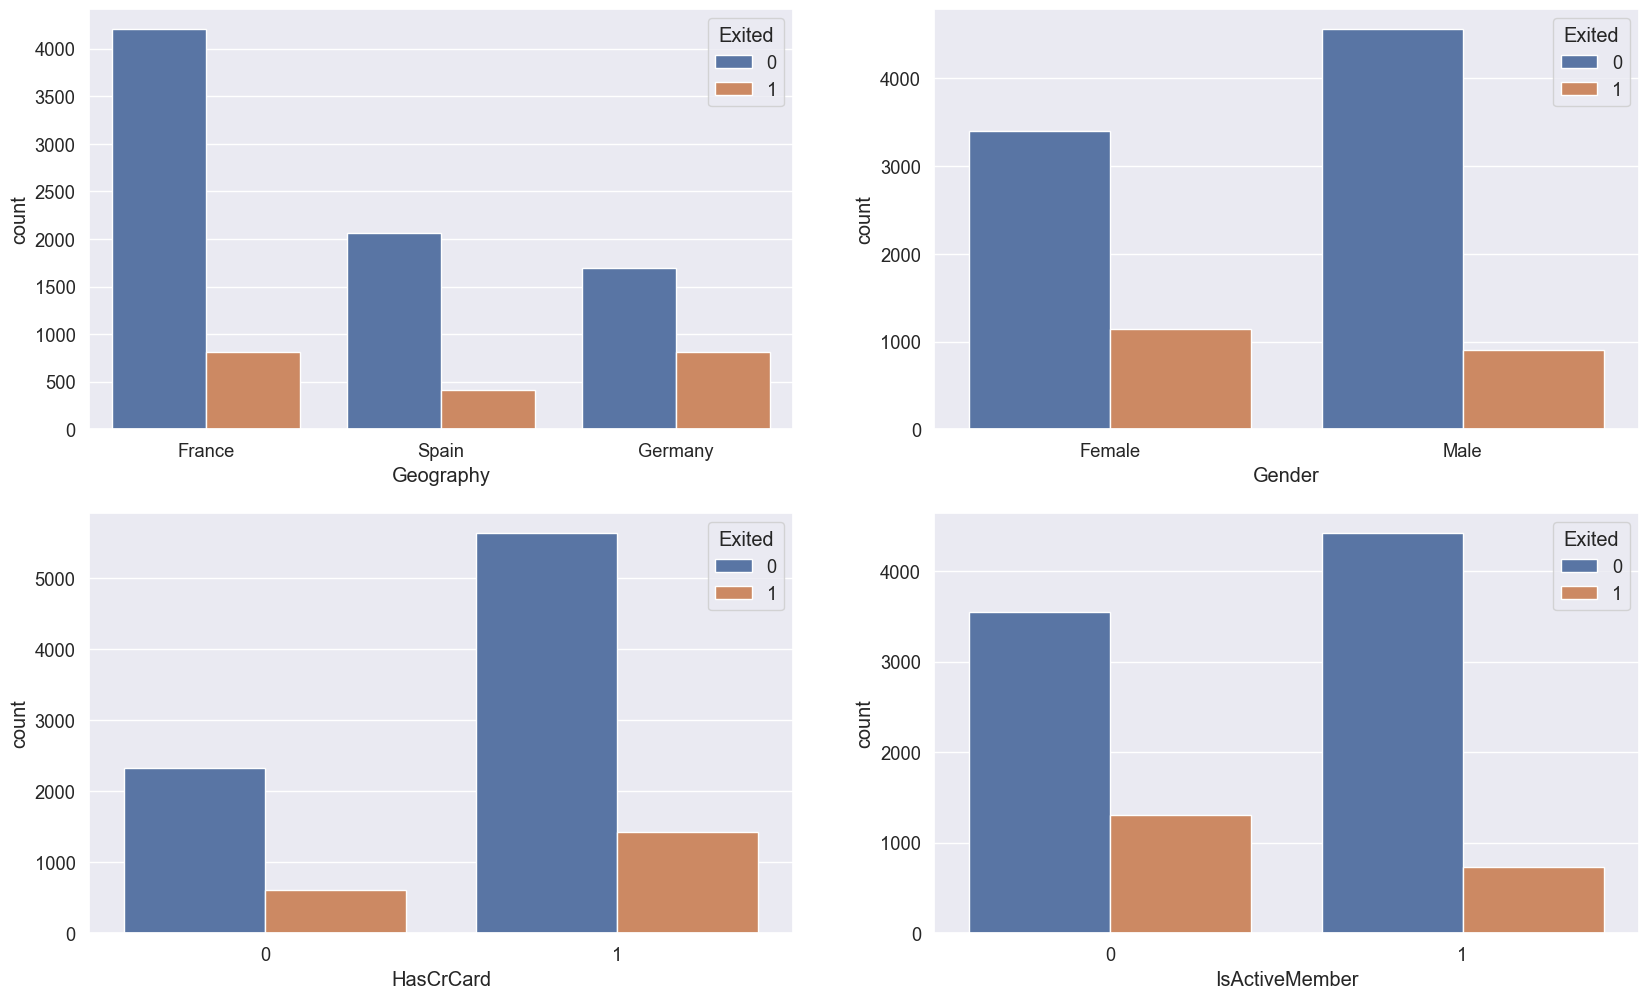

In [ ]:
# # Relacion entre Status (Churn 0 o 1) y variables categoricas.
### En este caso se pueden fijar que ocupe el df original, ya que se puede ver de mejor
### manera la relacion con las variables Geography y Gender.

fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

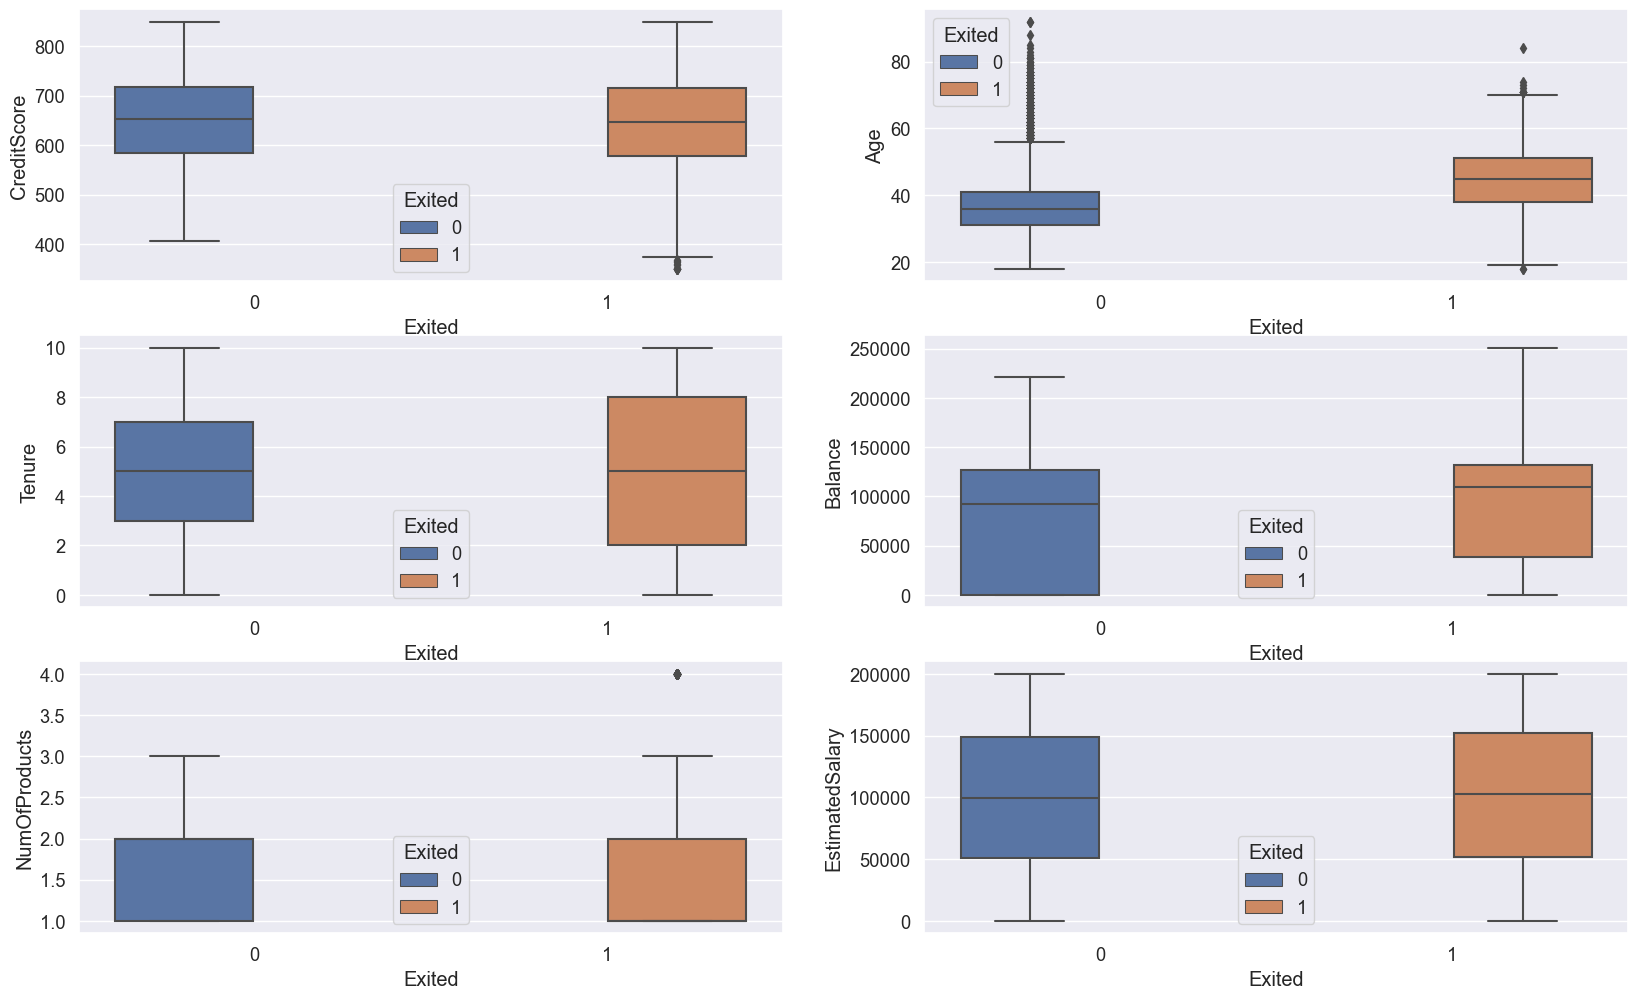

In [ ]:
# Relacion entre variable de prediccion y numericas

fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df2, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df2 , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df2, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df2, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df2, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df2, ax=axarr[2][1])

Observamos que para las variables como edad y Balance, existe una diferencia que se nota dependiendo del status del cliente. En cambio para la variable de salario estimado, no hay una tendencia observable.

## Preparacion de los Datos

### Normalizacion de los datos

Este paso es importante para realizar una Regresion Logistica, sobre todo si los datos son distantes en escalas. Lo anterior debido a que es mas facil la interpretacion de los coeficientes, que representan el cambio en el logaritmo de la razón de probabilidades (log-odds) por unidad de cambio en la variable independiente normalizada.

In [ ]:
# Split Train y Test
## random_state = semilla -> Hace mis resultados replicables, ya que la division es aleatoria

df2_train = df2.sample(frac=0.8,random_state=200)
df2_test = df2.drop(df2_train.index)
print(len(df2_train))
print(len(df2_test))

8000
2000


In [ ]:
# Separar columnas categoricas y continuas

cont_vars = ['CreditScore',  'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary']
cat_vars = ['HasCrCard', 'IsActiveMember','Geography_Germany','Geography_Spain', 'Gender_Male']
df2_train =  df2_train[['Exited'] + cont_vars + cat_vars]
df2_test = df2_test[['Exited'] + cont_vars + cat_vars]

df2_train.head()




,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,HasCrCard,IsActiveMember,Geography_Germany,Geography_Spain,Gender_Male
8159,0,461,25,6,0.00,2,15306.29,1,1,0,1,0
6332,0,619,35,4,90413.12,1,20555.21,1,1,0,0,0
8895,0,699,40,8,122038.34,1,102085.35,1,0,0,0,0
5351,0,558,41,2,124227.14,1,111184.67,1,1,1,0,1
4314,0,638,34,5,133501.36,1,155643.04,0,1,0,0,1


In [ ]:
#Cambiamos los 0 por -1 en las variables categoricas (TRAIN)

df2_train.loc[df2_train.HasCrCard == 0, 'HasCrCard'] = -1
df2_train.loc[df2_train.IsActiveMember == 0, 'IsActiveMember'] = -1
df2_train.loc[df2_train.Geography_Germany == 0, 'Geography_Germany'] = -1
df2_train.loc[df2_train.Geography_Spain == 0, 'Geography_Spain'] = -1
df2_train.loc[df2_train.Gender_Male == 0, 'Gender_Male'] = -1
df2_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,HasCrCard,IsActiveMember,Geography_Germany,Geography_Spain,Gender_Male
8159,0,461,25,6,0.00,2,15306.29,1,1,-1,1,-1
6332,0,619,35,4,90413.12,1,20555.21,1,1,-1,-1,-1
8895,0,699,40,8,122038.34,1,102085.35,1,-1,-1,-1,-1
5351,0,558,41,2,124227.14,1,111184.67,1,1,1,-1,1
4314,0,638,34,5,133501.36,1,155643.04,-1,1,-1,-1,1


In [ ]:
# minMax scaling the continuous variables (TRAIN)
minVec = df2_train[cont_vars].min().copy()
maxVec = df2_train[cont_vars].max().copy()
df2_train[cont_vars] = (df2_train[cont_vars]-minVec)/(maxVec-minVec)
df2_train.head()


,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,HasCrCard,IsActiveMember,Geography_Germany,Geography_Spain,Gender_Male
8159,0,0.222,0.094595,0.6,0.000000,0.333333,0.076118,1,1,-1,1,-1
6332,0,0.538,0.229730,0.4,0.360358,0.000000,0.102376,1,1,-1,-1,-1
8895,0,0.698,0.297297,0.8,0.486406,0.000000,0.510225,1,-1,-1,-1,-1
5351,0,0.416,0.310811,0.2,0.495130,0.000000,0.555744,1,1,1,-1,1
4314,0,0.576,0.216216,0.5,0.532094,0.000000,0.778145,-1,1,-1,-1,1


In [ ]:
df2_test.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,HasCrCard,IsActiveMember,Geography_Germany,Geography_Spain,Gender_Male
2,1,502,42,8,159660.80,3,113931.57,1,0,0,0,0
3,0,699,39,1,0.00,2,93826.63,0,0,0,0,0
5,1,645,44,8,113755.78,2,149756.71,1,0,0,1,1
17,0,549,24,9,0.00,2,14406.41,1,1,0,1,0
18,0,587,45,6,0.00,1,158684.81,0,0,0,1,1


In [ ]:
#Cambiamos los 0 por -1 en las variables categoricas (TEST)

df2_test.loc[df2_test.HasCrCard == 0, 'HasCrCard'] = -1
df2_test.loc[df2_test.IsActiveMember == 0, 'IsActiveMember'] = -1
df2_test.loc[df2_test.Geography_Germany == 0, 'Geography_Germany'] = -1
df2_test.loc[df2_test.Geography_Spain == 0, 'Geography_Spain'] = -1
df2_test.loc[df2_test.Gender_Male == 0, 'Gender_Male'] = -1
df2_test.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,HasCrCard,IsActiveMember,Geography_Germany,Geography_Spain,Gender_Male
2,1,502,42,8,159660.80,3,113931.57,1,-1,-1,-1,-1
3,0,699,39,1,0.00,2,93826.63,-1,-1,-1,-1,-1
5,1,645,44,8,113755.78,2,149756.71,1,-1,-1,1,1
17,0,549,24,9,0.00,2,14406.41,1,1,-1,1,-1
18,0,587,45,6,0.00,1,158684.81,-1,-1,-1,1,1


In [ ]:
# minMax scaling the continuous variables (TEST)
## Ocupamos vectores minMax que sacamos con la data de entrenamiento

df2_test[cont_vars] = (df2_test[cont_vars]-minVec)/(maxVec-minVec)
maxVec

CreditScore           850.00
Age                    92.00
Tenure                 10.00
Balance            250898.09
NumOfProducts           4.00
EstimatedSalary    199992.48
dtype: float64

In [ ]:
df2_test.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,HasCrCard,IsActiveMember,Geography_Germany,Geography_Spain,Gender_Male
2,1,0.304,0.324324,0.8,0.636357,0.666667,0.569485,1,-1,-1,-1,-1
3,0,0.698,0.283784,0.1,0.000000,0.333333,0.468912,-1,-1,-1,-1,-1
5,1,0.590,0.351351,0.8,0.453394,0.333333,0.748699,1,-1,-1,1,1
17,0,0.398,0.081081,0.9,0.000000,0.333333,0.071617,1,1,-1,1,-1
18,0,0.474,0.364865,0.6,0.000000,0.000000,0.793361,-1,-1,-1,1,1


## Regresion Logistica

In [ ]:
# Crear y entrenar el modelo de regresión logística

from sklearn.linear_model import LogisticRegression
import numpy as np
import statsmodels.api as sm

X_train = df2_train.loc[:, df2_train.columns != 'Exited']
y_train = df2_train.loc[:, df2_train.columns == 'Exited']
# Crear y entrenar el modelo de regresión logística con scikit-learn
model = LogisticRegression()
model.fit(X_train, y_train)

# Agrega una columna de intercepto (constante) al conjunto de datos
X_train_with_intercept = sm.add_constant(X_train)

# Crea un modelo de regresión logística con statsmodels
logit_model = sm.Logit(y_train, X_train_with_intercept)

# Ajusta el modelo de statsmodels
result = logit_model.fit()
result.summary()




Optimization terminated successfully.
         Current function value: 0.427272
         Iterations 6


C:\Users\cjret\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Exited   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7988
Method:                           MLE   Df Model:                           11
Date:                Sat, 09 Sep 2023   Pseudo R-squ.:                  0.1596
Time:                        12:29:31   Log-Likelihood:                -3418.2
converged:                       True   LL-Null:                       -4067.5
Covariance Type:            nonrobust   LLR p-value:                8.577e-272
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.9128      0.162    -17.929      0.000      -3.231      -2.594
CreditScore          -0.2636      0.155     -1.699      0.089      -0.568       0.041
Age                   5.4719      0.214     25.533      0.000       5.052       5.892
Tenure               -0.1536      0.105     -1.468      0.142      -0.359       0.051
Balance               0.6356      0.144      4.403      0.000       0.353       0.918
NumOfProducts        -0.5079      0.160     -3.167      0.002      -0.822      -0.194
EstimatedSalary       0.1740      0.106      1.643      0.100      -0.034       0.382
HasCrCard            -0.0252      0.033     -0.760      0.447      -0.090       0.040
IsActiveMember       -0.5679      0.033    -17.440      0.000      -0.632      -0.504
Geography_Germany     0.3882      0.038     10.245      0.000       0.314       0.462
Geography_Spain       0.0159      0.039      0.403      0.687      -0.061       0.093
Gender_Male          -0.2851      0.031     -9.346      0.000      -0.345      -0.225
=====================================================================================
"""

In [ ]:
# Obtiene los valores p de los coeficientes
p_values = result.pvalues[1:]  # Excluye el p-value del intercepto
print(f'Valores p de los coeficientes:\n{p_values}')


Valores p de los coeficientes:
CreditScore           8.939192e-02
Age                  8.588261e-144
Tenure                1.419765e-01
Balance               1.065962e-05
NumOfProducts         1.539370e-03
EstimatedSalary       1.004647e-01
HasCrCard             4.473038e-01
IsActiveMember        4.128407e-68
Geography_Germany     1.249238e-24
Geography_Spain       6.870225e-01
Gender_Male           9.143298e-21
dtype: float64


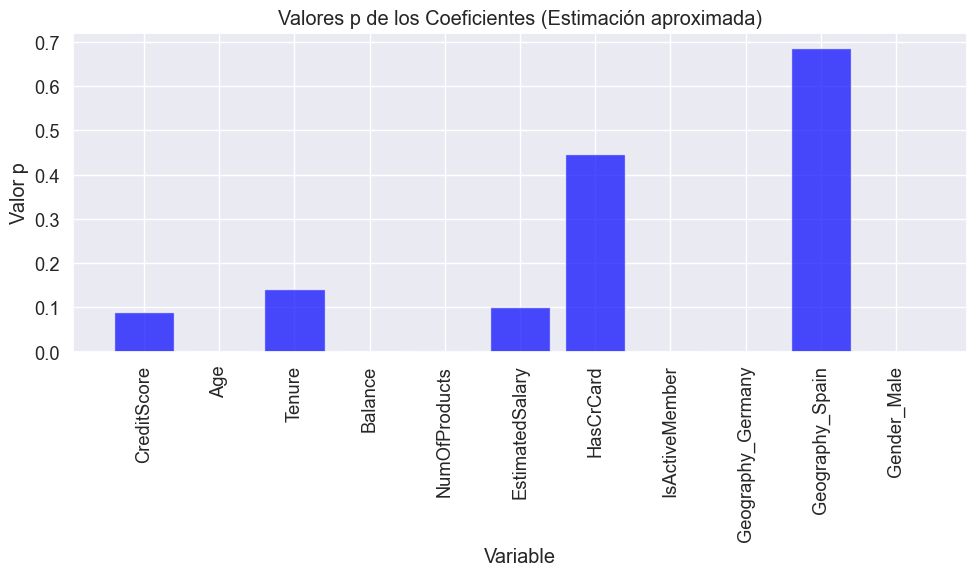

In [ ]:
# Crear un gráfico de barras para visualizar los valores p
plt.figure(figsize=(10, 6))
plt.bar(X_train.columns, p_values, color='blue', alpha=0.7)
plt.title('Valores p de los Coeficientes (Estimación aproximada)')
plt.xlabel('Variable')
plt.ylabel('Valor p')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Haremos un nuevo modelo solo con las variables significativas. Sin embargo la variable de Geography_Spain no se saca, ya que es una subvariable.

In [ ]:
# Nuevo modelo solo con variables significativas pvalue < 0.05

X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,HasCrCard,IsActiveMember,Geography_Germany,Geography_Spain,Gender_Male
8159,0.222,0.094595,0.6,0.000000,0.333333,0.076118,1,1,-1,1,-1
6332,0.538,0.229730,0.4,0.360358,0.000000,0.102376,1,1,-1,-1,-1
8895,0.698,0.297297,0.8,0.486406,0.000000,0.510225,1,-1,-1,-1,-1
5351,0.416,0.310811,0.2,0.495130,0.000000,0.555744,1,1,1,-1,1
4314,0.576,0.216216,0.5,0.532094,0.000000,0.778145,-1,1,-1,-1,1


In [ ]:
# Nuevo regresion solo con variables significativas

columnas_significativas = ['Age','Balance','NumOfProducts','IsActiveMember','Geography_Germany','Geography_Spain','Gender_Male']

X_train2 = df2_train[columnas_significativas]
y_train = df2_train.loc[:, df2_train.columns == 'Exited']
# Crear y entrenar el modelo de regresión logística con scikit-learn
model2 = LogisticRegression()
model2.fit(X_train2, y_train)

# Agrega una columna de intercepto (constante) al conjunto de datos
X_train_with_intercept2 = sm.add_constant(X_train2)

# Crea un modelo de regresión logística con statsmodels
logit_model2 = sm.Logit(y_train, X_train_with_intercept2)

# Ajusta el modelo de statsmodels
result2 = logit_model2.fit()
result2.summary()

Optimization terminated successfully.
         Current function value: 0.427788
         Iterations 6


C:\Users\cjret\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Exited   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7992
Method:                           MLE   Df Model:                            7
Date:                Sat, 09 Sep 2023   Pseudo R-squ.:                  0.1586
Time:                        12:29:49   Log-Likelihood:                -3422.3
converged:                       True   LL-Null:                       -4067.5
Covariance Type:            nonrobust   LLR p-value:                1.951e-274
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -3.0724      0.108    -28.323      0.000      -3.285      -2.860
Age                   5.4696      0.214     25.548      0.000       5.050       5.889
Balance               0.6436      0.144      4.463      0.000       0.361       0.926
NumOfProducts        -0.5044      0.160     -3.149      0.002      -0.818      -0.190
IsActiveMember       -0.5680      0.032    -17.479      0.000      -0.632      -0.504
Geography_Germany     0.3871      0.038     10.227      0.000       0.313       0.461
Geography_Spain       0.0153      0.039      0.389      0.697      -0.062       0.093
Gender_Male          -0.2856      0.030     -9.369      0.000      -0.345      -0.226
=====================================================================================
"""

Valores p de los coeficientes:
Age                  5.745073e-144
Balance               8.086337e-06
NumOfProducts         1.640390e-03
IsActiveMember        2.074435e-68
Geography_Germany     1.507436e-24
Geography_Spain       6.971306e-01
Gender_Male           7.351937e-21
dtype: float64


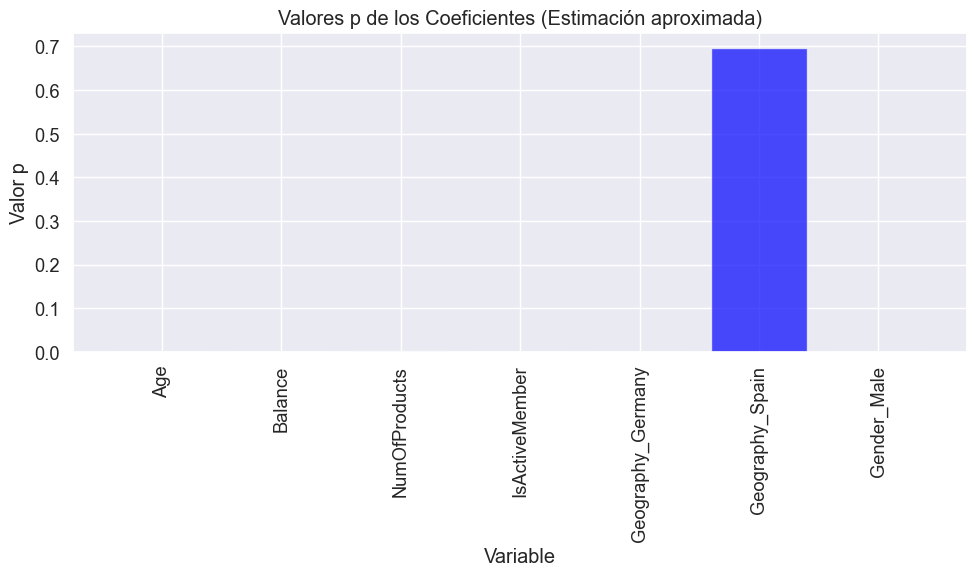

In [ ]:
# Obtiene los valores p de los coeficientes
p_values2 = result2.pvalues[1:]  # Excluye el p-value del intercepto
print(f'Valores p de los coeficientes:\n{p_values2}')

# Crear un gráfico de barras para visualizar los valores p
plt.figure(figsize=(10, 6))
plt.bar(X_train2.columns, p_values2, color='blue', alpha=0.7)
plt.title('Valores p de los Coeficientes (Estimación aproximada)')
plt.xlabel('Variable')
plt.ylabel('Valor p')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# Realizamos las predicciones para y
## Ante en X_test debemos colocar solo las columnas significativas

X_test2 = df2_test[columnas_significativas]
X_test2.head()

,Age,Balance,NumOfProducts,IsActiveMember,Geography_Germany,Geography_Spain,Gender_Male
2,0.324324,0.636357,0.666667,-1,-1,-1,-1
3,0.283784,0.000000,0.333333,-1,-1,-1,-1
5,0.351351,0.453394,0.333333,-1,-1,1,1
17,0.081081,0.000000,0.333333,1,-1,1,-1
18,0.364865,0.000000,0.000000,-1,-1,1,1


In [ ]:
# Prediccion de Y

y_pred = model2.predict(X_test2)  # Predicciones de etiquetas de clase (0 o 1)
y_prob = model2.predict_proba(X_test2)[:, 1]  # Probabilidades de la clase positiva, la cual por default es 1, es decir, cuando el cliente se va.


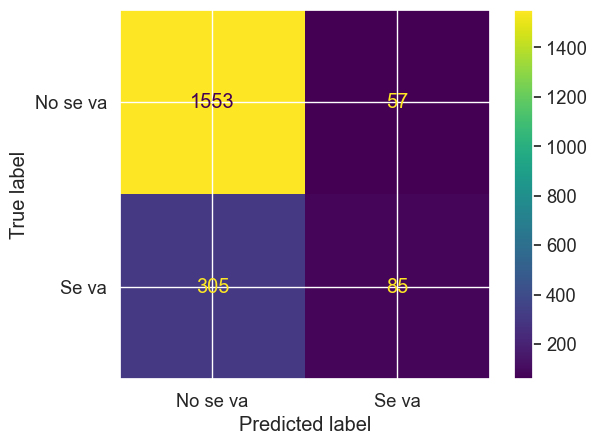

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_test = df2_test['Exited']

# y_true son las etiquetas reales y y_pred son las predicciones del modelo
confusion = confusion_matrix(y_test, y_pred)

#Graficamos matriz de confusion
class_names = ['No se va', 'Se va']

disp = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=class_names)
disp.plot()

Matriz de confusion se lee de la siguiente forma:

[[TN  FP]\
 [FN  TP]]

 **True Negative** (TN): Son los verdaderos negativos. Esto se refiere a las predicciones correctas realizadas para la clase negativa (en este caso 0).

 **False Negative** (FN); Son los falsos negativos. EStos se refieren a las predicciones que el modelo identifico como negativas (0) de manera incorrecta (omisiones).

 **False Positive** (FP): Son los falsos positivos (Falsas Alarmas). Son las predicciones que el modelo identifico como positivos (1) de manera incorrecta.

 **True Positive** (TP): Son los verdadores positivos. Estas son las predicciones que el modelo identifico como positivas (1) de manera correcta.


In [ ]:
#Accuracy, Sensitivity y Specificity, Precision y F-Score

accuracy = (confusion[1, 1] + confusion[0, 0]) / np.sum(confusion)
sensitivity = confusion[1, 1] / (confusion[1, 1] + confusion[1, 0])
specificity = confusion[0, 0] / (confusion[0, 0] + confusion[0, 1])
precision = confusion[1, 1] / (confusion[1, 1] + confusion[0, 1])
f_score = (2 * precision * sensitivity) / (precision + sensitivity)



print('Accuracy =', accuracy)
print('Sensitivity =', sensitivity)
print('Specificity =', specificity)
print('Precision=', precision)
print('F-Score =', f_score)



Accuracy = 0.819
Sensitivity = 0.21794871794871795
Specificity = 0.9645962732919254
Precision= 0.5985915492957746
F-Score = 0.3195488721804511


**Accuracy** (Exactitud):
La exactitud mide la proporción de predicciones correctas realizadas por el modelo. Se calcula como:

Accuracy= (TP+TN)/(FP+FN+TP+TN)

**Sensibilidad** (Recall):
La sensibilidad mide la proporción de verdaderos positivos con respecto a todos los casos reales de la clase positiva. Se calcula como:

Sensibilidad= TP/(FN+TP)
​

**Especificidad**:
La especificidad mide la proporción de verdaderos negativos con respecto a todos los casos reales de la clase negativa. Se calcula como:

Especificidad= TN/(FP+TN)
​
**Precision**:
La precision mide cuán confiables son las predicciones positivas del modelo. Es útil cuando deseas minimizar los falsos positivos y estás dispuesto a aceptar una menor cobertura de casos positivos. Esta se calcula como:

Precision = TP/(TP+FP)

​
**F_SCORE**:
El F-score proporciona una métrica única que tiene en cuenta tanto la precision como el recall. Es útil cuando deseas equilibrar la precisión y el recall en tus predicciones. El valor del F-score está en el rango de 0 a 1, donde un valor más alto indica un mejor rendimiento del modelo en términos de precisión y recall. Se calcula como:

F_score = 2 * precision * Sensitivity/(Precision + Sensitivity)

Ahora la pregunta es: ¿Que es mas valioso, identificar correctamente a los clientes que potencialmente pueden irse o identificar correctamente a aquellos que quieren quedarse?

Lo anterior depende en gran parte de los objetivos de la empresa y sobre todo de los costos asociados.

Si para mi retener a un cliente me resulta costoso, me conviene centrarme en aquellos clientes menos propensos a irse, los cuales significan un gran valor para la empresa. A paertir de esto, me podria interesar aumentar la especificidad del modelo (Con clase positiva 1 en este caso).

Sin embargo, si el impacto financiero de aquellos que se van es significativo, retener clientes se convierte en una prioridad. En este caso, me podria convenir quizas tener una mayor sensibilidad en el modelo (Con clase positiva 1).

A partir de lo anterior, se puede llegar a un balance mediante el umbral de prediccion o **Threshold**. Este umbral al ajustarlo nos permite decidir el valor limite en donde el modelo toma la decision de clasificar la variable, basado en probabilidades.

Accuracy:  81.45 %
Sensitivity:  34.62 %
Specificity:  92.8 %
Precision:  53.78 %
F-Score:  42.12 %


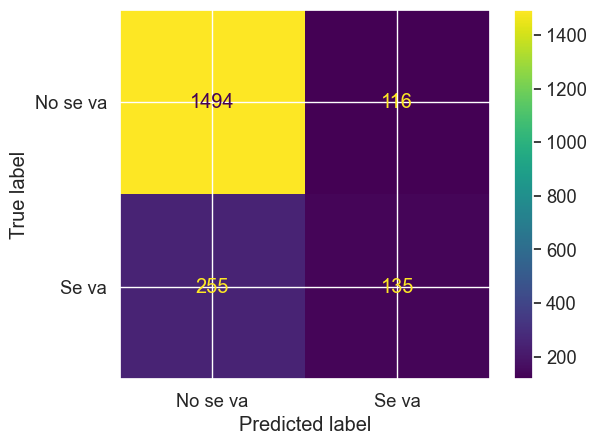

In [ ]:
# Ocuparemos sklearn.metrics para ver que se puede hacer de forma mas rapida los calculos de precision, especificidad, etc...
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


# Supongamos que tienes las probabilidades predichas en 'y_prob' (probabilidad de clase positiva)

# Define el nuevo umbral
nuevo_umbral = 0.4  # Puedes ajustar este valor según tus necesidades

# Aplica el nuevo umbral para clasificar las predicciones
y_pred_con_umbral = (y_prob >= nuevo_umbral).astype(int)

# Calcula la matriz de confusión con el nuevo umbral
confusion_nuevo_umbral = confusion_matrix(y_test, y_pred_con_umbral)

#Graficamos matriz de confusion
class_names = ['No se va', 'Se va']

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_nuevo_umbral, display_labels=class_names)
disp.plot()

#Accuracy, Sensitivity y Specificity, Precision y F-Score

accuracy1 = accuracy_score(y_test, y_pred_con_umbral)*100
print('Accuracy: ',accuracy1.round(2),'%')

sensitivity1 = recall_score(y_test, y_pred_con_umbral)*100
print('Sensitivity: ',sensitivity1.round(2),'%')

specificity1 = confusion_nuevo_umbral[0, 0] / (confusion_nuevo_umbral[0, 0] + confusion_nuevo_umbral[0, 1])*100
print('Specificity: ',specificity1.round(2),'%')

precision1 = precision_score(y_test, y_pred_con_umbral)*100
print('Precision: ',precision1.round(2),'%')

fscore1 = f1_score(y_test, y_pred_con_umbral)*100
print('F-Score: ',fscore1.round(2),'%')